<a href="https://colab.research.google.com/github/Andre-do-Amaral/Competicao_Regressao/blob/main/7COMPETICAO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entendendo os Dados

faixa etaria -> 1 (10-14); 2 (15-17); 3 (18-24); 4 (25-29); 5 (30-39); 6 (40-49); 7 (50-64); 8 (65+)


Sexo -> 1 (masc); 2 (fem); -1 (missing)


Raça -> 1 (indig); 2(Branca); 4(Preta); 6(amarela); 8(Parda); 9(nao identidicado); -1(missing)


Escolaridade -> 1(Analfabeto); 2(Ate 5A.Inc); 3(5A co Fund); 4(6 a 9 fund); 5(fund compl); 6(medio incomp);7(medio compl); 8(sup incomp); 9(sup comp); 10 (mestrado); 11(Doutorado); -1 (ignorado)

portador de deficiencia -> 1(sim) 0 (nao)


tamanho empresa -> 1 (zero); 2(ate 4); 3(de 5 a 9); 4(10 a 19); 5(20 a 49); 6(50 a 99); 7(100 a 249); 8(250 a 499); 9(500 a 999); 10 (1000+); -1 (ignorado)



In [3]:
# instalando biblioteca para encoders
!pip install category_encoders

     |████████████████████████████████| 82 kB 239 kB/s 


In [4]:
# importando principais bibliotecas para uso e os dados de treino
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
dados = pd.read_csv('/content/drive/MyDrive/7_competicao/treino.csv')
dados

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


sexo  idade  faixa_etaria  ...  tempo_no_emprego  remuneracao       id
0         1     31             5  ...               3.8      2551.21  1559958
1         1     58             7  ...               1.9      3248.53   520410
2         2     58             7  ...             255.9      1662.69  2373235
3         1     29             4  ...               0.4       918.82  1358000
4         1     54             7  ...             132.9      6479.11   155786
...     ...    ...           ...  ...               ...          ...      ...
14995     1     19             3  ...              16.1      1046.37   593885
14996     1     41             6  ...             175.9      1773.77  1483323
14997     2     62             7  ...              30.4      5900.66   968508
14998     1     45             6  ...              21.9      3108.81  1334465
14999     2     29             4  ...             103.9      5442.31  2207001

[15000 rows x 11 columns]

# EDA

In [5]:
for i in dados.columns:
  print(f'==================={i}===================')
  unicos = dados[i].unique()
  print(f'Unicos: {unicos}')
  nulos = len(dados[dados[i]==-1])
  print(f'Nulos: {nulos}')


===================sexo===================
Unicos: [1 2]
Nulos: 0
===================idade===================
Unicos: [31 58 29 54 26 55 41 50 37 27 53 52 23 47 24 40 38 43 56 36 25 28 20 19
 33 21 39 45 49 48 63 46 35 18 34 32 64 30 60 73 44 42 22 57 51 59 66 62
 61 17 65 68 70 72 67 69 71 16 79 74 77 15 14 80 78 76 84]
Nulos: 0
===================faixa_etaria===================
Unicos: [5 7 4 6 3 8 2 1]
Nulos: 0
===================cor_raca===================
Unicos: [ 8 99  9  2  4  6  1]
Nulos: 0
===================escolaridade===================
Unicos: [ 7  9  4  6  8  2  5 10  3 11  1]
Nulos: 0
===================horas_trabalho_por_semana===================
Unicos: [44 30 40 13 42 33 36  0 21 20  1 24 25 43 12 22 38 35  4  6 34 15 28 27
 32 18 11  8 31  9 16 29  5 39 19 26 41 14 37 17  7  2 23 10  3]
Nulos: 0
===================portador_de_deficiencia===================
Unicos: [0 1]
Nulos: 0
===================tamanho_da_empresa===================
Unicos: [10  3  7  8  5  4  6  

In [6]:
cat = ['sexo', 'faixa_etaria', 'cor_raca', 'escolaridade', 'portador_de_deficiencia', 'tamanho_da_empresa']
num = dados.drop(cat, axis = 1).columns.copy()

================sexo=============


sexo      sexo
1  8723  0.581533
2  6277  0.418467

Grafico de distribuição de idade com relação a sexo


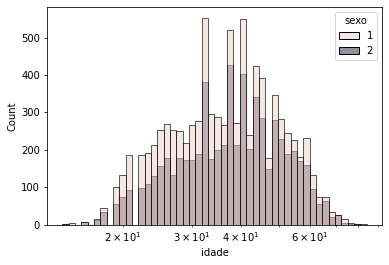

==================Categoria 1


count    8723.000000
mean       38.013986
std        11.658769
min        14.000000
25%        29.000000
50%        37.000000
75%        46.000000
max        80.000000
Name: idade, dtype: float64

==================Categoria 2


count    6277.000000
mean       39.109447
std        11.479467
min        14.000000
25%        30.000000
50%        38.000000
75%        47.000000
max        84.000000
Name: idade, dtype: float64

Grafico de distribuição de horas_trabalho_por_semana com relação a sexo


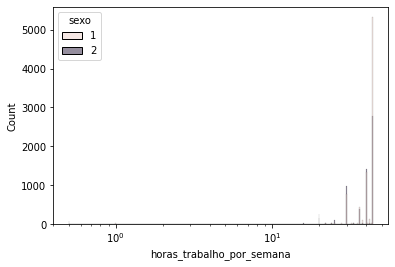

==================Categoria 1


count    8723.000000
mean       39.990313
std         7.534884
min         0.500000
25%        40.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 2


count    6277.000000
mean       38.040943
std         7.937093
min         0.500000
25%        33.000000
50%        40.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

Grafico de distribuição de tempo_no_emprego com relação a sexo


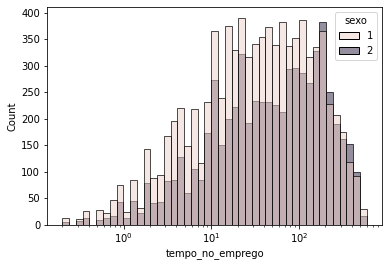

==================Categoria 1


count    8723.000000
mean       75.113355
std        95.507988
min         0.200000
25%        11.000000
50%        34.900000
75%       103.900000
max       596.500000
Name: tempo_no_emprego, dtype: float64

==================Categoria 2


count    6277.000000
mean       94.439334
std       106.620387
min         0.200000
25%        15.400000
50%        50.900000
75%       145.500000
max       560.900000
Name: tempo_no_emprego, dtype: float64

Grafico de distribuição de remuneracao com relação a sexo


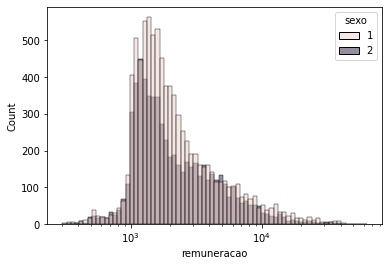

==================Categoria 1


count     8723.000000
mean      3099.468909
std       3969.243617
min        301.430000
25%       1298.925000
50%       1775.350000
75%       3074.955000
max      63218.070000
Name: remuneracao, dtype: float64

==================Categoria 2


count     6277.000000
mean      2977.263224
std       3507.081718
min        331.300000
25%       1244.370000
50%       1743.380000
75%       3385.710000
max      56849.230000
Name: remuneracao, dtype: float64

Grafico de distribuição de id com relação a sexo


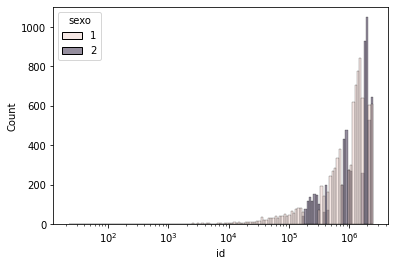

==================Categoria 1


count    8.723000e+03
mean     1.114926e+06
std      6.618209e+05
min      2.200000e+01
25%      5.635830e+05
50%      1.193281e+06
75%      1.535442e+06
max      2.351370e+06
Name: id, dtype: float64

==================Categoria 2


count    6.277000e+03
mean     1.390753e+06
std      7.385352e+05
min      1.728660e+05
25%      8.148660e+05
50%      1.736659e+06
75%      1.999410e+06
max      2.459844e+06
Name: id, dtype: float64

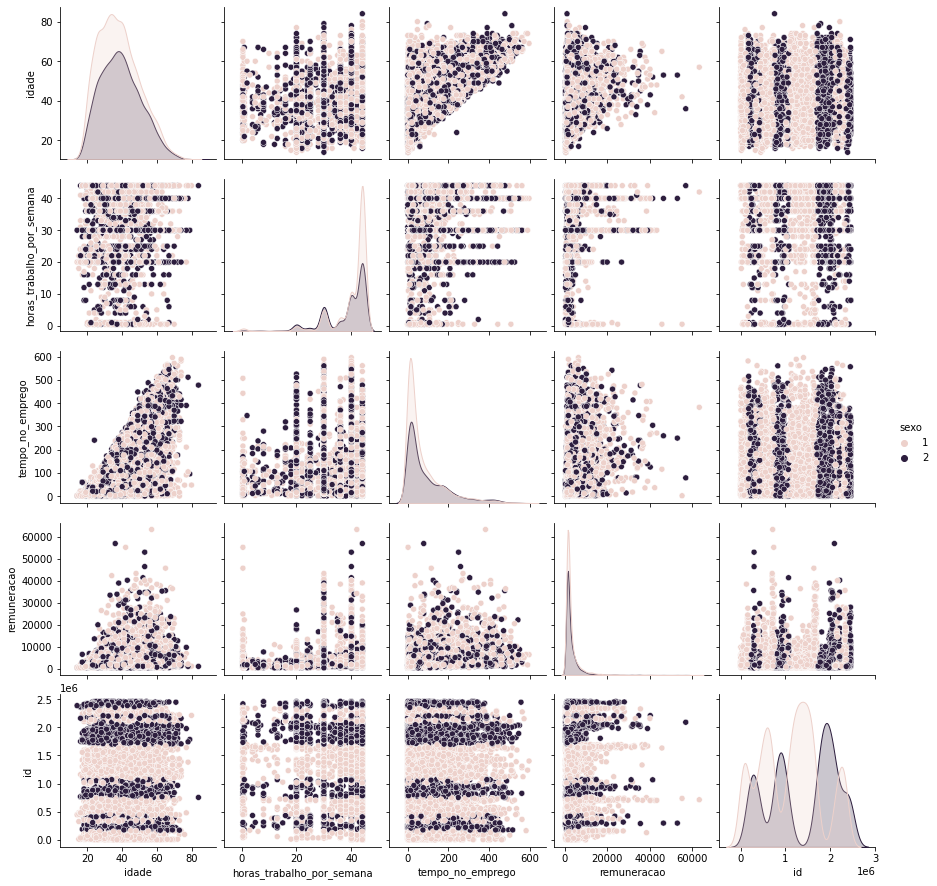

================faixa_etaria=============


faixa_etaria  faixa_etaria
5          4712      0.314133
6          3794      0.252933
7          2467      0.164467
4          2059      0.137267
3          1650      0.110000
8           269      0.017933
2            47      0.003133
1             2      0.000133

Grafico de distribuição de idade com relação a faixa_etaria


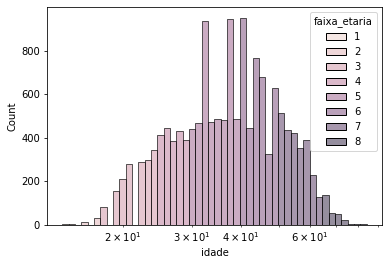

==================Categoria 5


count    4712.000000
mean       34.558149
std         2.856880
min        30.000000
25%        32.000000
50%        35.000000
75%        37.000000
max        39.000000
Name: idade, dtype: float64

==================Categoria 7


count    2467.000000
mean       55.388731
std         3.990978
min        50.000000
25%        52.000000
50%        55.000000
75%        58.000000
max        64.000000
Name: idade, dtype: float64

==================Categoria 4


count    2059.000000
mean       26.972317
std         1.406534
min        25.000000
25%        26.000000
50%        27.000000
75%        28.000000
max        29.000000
Name: idade, dtype: float64

==================Categoria 6


count    3794.000000
mean       44.037428
std         2.866237
min        40.000000
25%        41.000000
50%        44.000000
75%        47.000000
max        49.000000
Name: idade, dtype: float64

==================Categoria 3


count    1650.000000
mean       21.698788
std         1.795368
min        18.000000
25%        20.000000
50%        22.000000
75%        23.000000
max        24.000000
Name: idade, dtype: float64

==================Categoria 8


count    269.000000
mean      68.334572
std        3.220670
min       65.000000
25%       66.000000
50%       67.000000
75%       70.000000
max       84.000000
Name: idade, dtype: float64

==================Categoria 2


count    47.000000
mean     16.531915
std       0.654452
min      15.000000
25%      16.000000
50%      17.000000
75%      17.000000
max      17.000000
Name: idade, dtype: float64

==================Categoria 1


count     2.0
mean     14.0
std       0.0
min      14.0
25%      14.0
50%      14.0
75%      14.0
max      14.0
Name: idade, dtype: float64

Grafico de distribuição de horas_trabalho_por_semana com relação a faixa_etaria


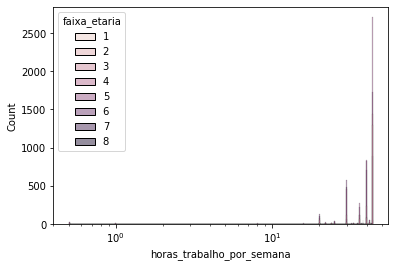

==================Categoria 5


count    4712.000000
mean       39.717317
std         7.496854
min         0.500000
25%        40.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 7


count    2467.000000
mean       37.420146
std         7.988276
min         0.500000
25%        30.000000
50%        40.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 4


count    2059.000000
mean       40.917921
std         6.805347
min         0.500000
25%        40.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 6


count    3794.000000
mean       38.236426
std         7.977979
min         0.500000
25%        36.000000
50%        40.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 3


count    1650.000000
mean       41.226970
std         7.173762
min         0.500000
25%        44.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 8


count    269.000000
mean      35.377323
std        8.563078
min        0.500000
25%       30.000000
50%       40.000000
75%       40.000000
max       44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 2


count    47.000000
mean     26.489362
std       8.885436
min      16.000000
25%      20.000000
50%      22.000000
75%      30.000000
max      44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 1


count     2.000000
mean     25.000000
std       7.071068
min      20.000000
25%      22.500000
50%      25.000000
75%      27.500000
max      30.000000
Name: horas_trabalho_por_semana, dtype: float64

Grafico de distribuição de tempo_no_emprego com relação a faixa_etaria


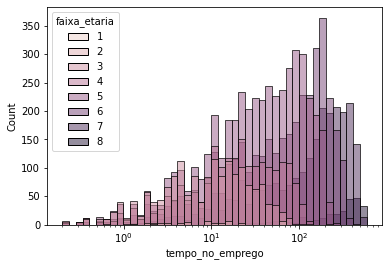

==================Categoria 5


count    4712.000000
mean       55.556070
std        52.354841
min         0.200000
25%        13.300000
50%        37.300000
75%        87.725000
max       256.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 7


count    2467.000000
mean      178.376246
std       138.851028
min         0.300000
25%        47.900000
50%       160.800000
75%       280.550000
max       536.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 4


count    2059.000000
mean       29.087761
std        27.314794
min         0.200000
25%         8.600000
50%        19.400000
75%        42.950000
max       133.400000
Name: tempo_no_emprego, dtype: float64

==================Categoria 6


count    3794.000000
mean      100.494307
std        87.324300
min         0.200000
25%        21.425000
50%        78.900000
75%       165.175000
max       448.500000
Name: tempo_no_emprego, dtype: float64

==================Categoria 3


count    1650.000000
mean       14.866848
std        16.417564
min         0.200000
25%         3.800000
50%         9.900000
75%        20.375000
max       240.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 8


count    269.000000
mean     296.520074
std      168.447713
min        0.500000
25%      146.900000
50%      322.200000
75%      430.900000
max      596.500000
Name: tempo_no_emprego, dtype: float64

==================Categoria 2


count    47.000000
mean     15.110638
std      18.249351
min       0.600000
25%       3.050000
50%       9.600000
75%      15.650000
max      59.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 1


count    2.000000
mean     1.800000
std      0.565685
min      1.400000
25%      1.600000
50%      1.800000
75%      2.000000
max      2.200000
Name: tempo_no_emprego, dtype: float64

Grafico de distribuição de remuneracao com relação a faixa_etaria


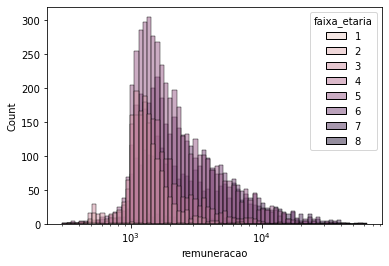

==================Categoria 5


count     4712.000000
mean      2858.090119
std       3093.970451
min        301.430000
25%       1300.477500
50%       1794.975000
75%       3137.495000
max      56849.230000
Name: remuneracao, dtype: float64

==================Categoria 7


count     2467.000000
mean      4401.380032
std       5381.335815
min        343.830000
25%       1517.980000
50%       2434.260000
75%       5053.110000
max      63218.070000
Name: remuneracao, dtype: float64

==================Categoria 4


count     2059.000000
mean      2001.343040
std       1691.502151
min        348.260000
25%       1175.530000
50%       1498.040000
75%       2077.405000
max      26432.260000
Name: remuneracao, dtype: float64

==================Categoria 6


count     3794.000000
mean      3569.887794
std       4223.296842
min        327.040000
25%       1438.232500
50%       2151.115000
75%       3976.010000
max      55122.470000
Name: remuneracao, dtype: float64

==================Categoria 3


count     1650.000000
mean      1416.868861
std        757.769237
min        320.270000
25%       1069.165000
50%       1264.815000
75%       1550.617500
max      13553.440000
Name: remuneracao, dtype: float64

==================Categoria 8


count      269.000000
mean      5019.546543
std       6104.590848
min        519.360000
25%       1610.240000
50%       3011.370000
75%       5809.880000
max      45649.020000
Name: remuneracao, dtype: float64

==================Categoria 2


count      47.000000
mean      965.365106
std      1009.989842
min       466.530000
25%       517.555000
50%       541.950000
75%      1004.840000
max      6528.050000
Name: remuneracao, dtype: float64

==================Categoria 1


count      2.00000
mean     519.98000
std       24.56489
min      502.61000
25%      511.29500
50%      519.98000
75%      528.66500
max      537.35000
Name: remuneracao, dtype: float64

Grafico de distribuição de id com relação a faixa_etaria


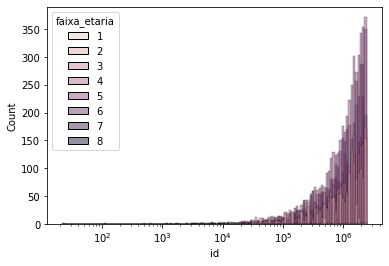

==================Categoria 5


count    4.712000e+03
mean     1.236779e+06
std      6.982127e+05
min      2.200000e+01
25%      6.366130e+05
50%      1.259865e+06
75%      1.837264e+06
max      2.459844e+06
Name: id, dtype: float64

==================Categoria 7


count    2.467000e+03
mean     1.249547e+06
std      7.070322e+05
min      1.150000e+02
25%      6.923385e+05
50%      1.212964e+06
75%      1.856848e+06
max      2.459357e+06
Name: id, dtype: float64

==================Categoria 4


count    2.059000e+03
mean     1.214621e+06
std      7.075804e+05
min      3.195000e+03
25%      6.049820e+05
50%      1.252962e+06
75%      1.833246e+06
max      2.457833e+06
Name: id, dtype: float64

==================Categoria 6


count    3.794000e+03
mean     1.252806e+06
std      7.131787e+05
min      1.397000e+03
25%      6.453140e+05
50%      1.247056e+06
75%      1.875725e+06
max      2.458471e+06
Name: id, dtype: float64

==================Categoria 3


count    1.650000e+03
mean     1.150992e+06
std      7.219906e+05
min      4.815000e+03
25%      5.179452e+05
50%      1.193492e+06
75%      1.759139e+06
max      2.456794e+06
Name: id, dtype: float64

==================Categoria 8


count    2.690000e+02
mean     1.275369e+06
std      6.900723e+05
min      6.847000e+03
25%      7.515060e+05
50%      1.282147e+06
75%      1.858394e+06
max      2.450172e+06
Name: id, dtype: float64

==================Categoria 2


count    4.700000e+01
mean     9.751656e+05
std      7.452096e+05
min      1.371800e+04
25%      4.764070e+05
50%      7.648670e+05
75%      1.749212e+06
max      2.362464e+06
Name: id, dtype: float64

==================Categoria 1


count    2.000000e+00
mean     1.416436e+06
std      1.369908e+06
min      4.477640e+05
25%      9.320998e+05
50%      1.416436e+06
75%      1.900771e+06
max      2.385107e+06
Name: id, dtype: float64

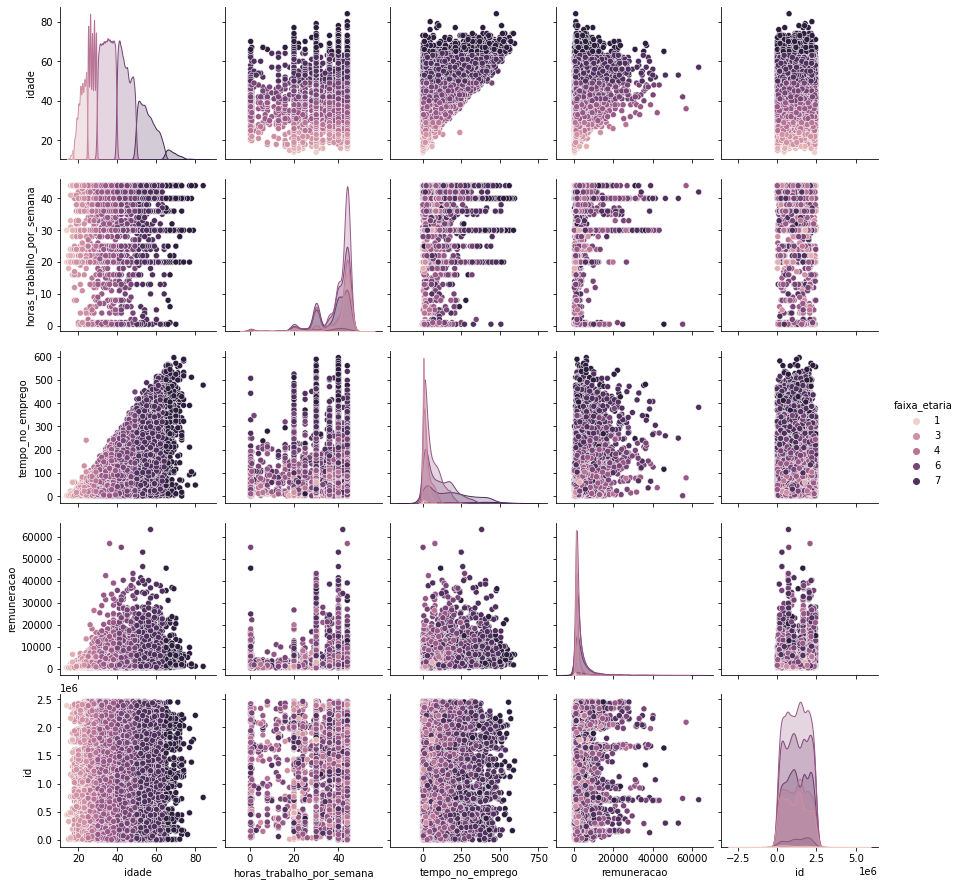

================cor_raca=============


cor_raca  cor_raca
8       6618  0.441200
99      4920  0.328000
9       1618  0.107867
2       1442  0.096133
4        307  0.020467
6         74  0.004933
1         21  0.001400

Grafico de distribuição de idade com relação a cor_raca


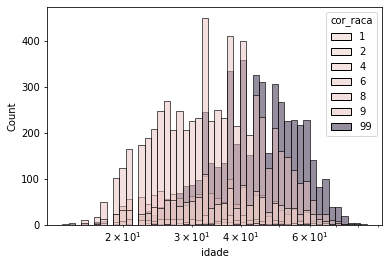

==================Categoria 8


count    6618.000000
mean       35.436386
std        10.559658
min        14.000000
25%        27.000000
50%        34.000000
75%        42.000000
max        78.000000
Name: idade, dtype: float64

==================Categoria 99


count    4920.000000
mean       44.543699
std        10.998425
min        17.000000
25%        37.000000
50%        44.000000
75%        52.000000
max        84.000000
Name: idade, dtype: float64

==================Categoria 9


count    1618.000000
mean       34.394932
std        10.302975
min        15.000000
25%        26.000000
50%        33.000000
75%        41.000000
max        71.000000
Name: idade, dtype: float64

==================Categoria 2


count    1442.000000
mean       37.040915
std        11.369529
min        17.000000
25%        28.000000
50%        35.500000
75%        44.000000
max        77.000000
Name: idade, dtype: float64

==================Categoria 4


count    307.000000
mean      34.612378
std       11.184267
min       16.000000
25%       26.000000
50%       33.000000
75%       41.000000
max       67.000000
Name: idade, dtype: float64

==================Categoria 6


count    74.000000
mean     38.472973
std      10.704273
min      19.000000
25%      32.250000
50%      37.500000
75%      44.000000
max      64.000000
Name: idade, dtype: float64

==================Categoria 1


count    21.000000
mean     41.714286
std      11.274497
min      24.000000
25%      32.000000
50%      43.000000
75%      51.000000
max      60.000000
Name: idade, dtype: float64

Grafico de distribuição de horas_trabalho_por_semana com relação a cor_raca


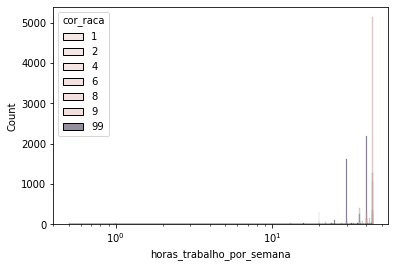

==================Categoria 8


count    6618.000000
mean       41.335827
std         7.225396
min         0.500000
25%        44.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 99


count    4920.000000
mean       34.851220
std         6.807448
min         1.000000
25%        30.000000
50%        40.000000
75%        40.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 9


count    1618.000000
mean       41.782756
std         6.407608
min         0.500000
25%        44.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 2


count    1442.000000
mean       40.514563
std         8.538141
min         0.500000
25%        40.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 4


count    307.000000
mean      41.700326
std        6.139961
min        0.500000
25%       44.000000
50%       44.000000
75%       44.000000
max       44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 6


count    74.000000
mean     41.006757
std       8.182211
min       0.500000
25%      44.000000
50%      44.000000
75%      44.000000
max      44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 1


count    21.000000
mean     34.619048
std      14.235435
min       1.000000
25%      25.000000
50%      44.000000
75%      44.000000
max      44.000000
Name: horas_trabalho_por_semana, dtype: float64

Grafico de distribuição de tempo_no_emprego com relação a cor_raca


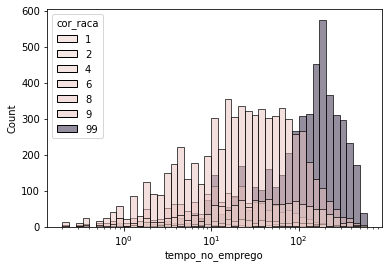

==================Categoria 8


count    6618.000000
mean       46.545406
std        59.441672
min         0.200000
25%         9.300000
50%        24.600000
75%        62.800000
max       561.600000
Name: tempo_no_emprego, dtype: float64

==================Categoria 99


count    4920.000000
mean      158.235833
std       121.425274
min         0.200000
25%        58.475000
50%       142.500000
75%       222.250000
max       596.500000
Name: tempo_no_emprego, dtype: float64

==================Categoria 9


count    1618.000000
mean       29.170519
std        46.465100
min         0.200000
25%         5.300000
50%        14.000000
75%        32.900000
max       556.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 2


count    1442.000000
mean       64.553745
std        78.580536
min         0.200000
25%        12.600000
50%        34.300000
75%        88.125000
max       545.500000
Name: tempo_no_emprego, dtype: float64

==================Categoria 4


count    307.000000
mean      46.504560
std       59.329372
min        0.300000
25%       10.450000
50%       23.500000
75%       58.550000
max      472.300000
Name: tempo_no_emprego, dtype: float64

==================Categoria 6


count     74.000000
mean      66.271622
std       72.022071
min        0.300000
25%       16.250000
50%       43.350000
75%       92.275000
max      265.400000
Name: tempo_no_emprego, dtype: float64

==================Categoria 1


count     21.000000
mean      94.585714
std      114.533664
min        4.600000
25%       19.900000
50%       63.400000
75%       95.600000
max      436.800000
Name: tempo_no_emprego, dtype: float64

Grafico de distribuição de remuneracao com relação a cor_raca


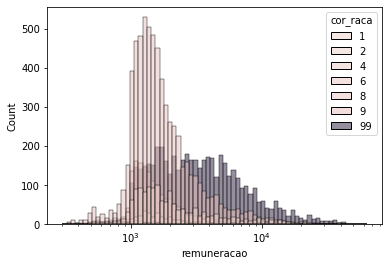

==================Categoria 8


count     6618.000000
mean      2170.959406
std       2484.945216
min        304.290000
25%       1195.655000
50%       1527.170000
75%       2201.855000
max      63218.070000
Name: remuneracao, dtype: float64

==================Categoria 99


count     4920.000000
mean      4709.939933
std       4975.623745
min        331.300000
25%       1748.935000
50%       3098.855000
75%       5569.750000
max      52916.240000
Name: remuneracao, dtype: float64

==================Categoria 9


count     1618.000000
mean      1813.670365
std       1640.942424
min        320.270000
25%       1132.640000
50%       1386.570000
75%       1921.797500
max      27909.880000
Name: remuneracao, dtype: float64

==================Categoria 2


count     1442.000000
mean      3036.160929
std       4050.541520
min        301.430000
25%       1262.457500
50%       1711.605000
75%       3004.522500
max      56849.230000
Name: remuneracao, dtype: float64

==================Categoria 4


count      307.000000
mean      1981.648436
std       1567.627302
min        488.960000
25%       1237.455000
50%       1538.730000
75%       2090.350000
max      11999.580000
Name: remuneracao, dtype: float64

==================Categoria 6


count       74.000000
mean      2733.969865
std       4735.013555
min        549.390000
25%       1151.995000
50%       1648.160000
75%       2378.827500
max      40019.740000
Name: remuneracao, dtype: float64

==================Categoria 1


count       21.000000
mean      2918.675238
std       2604.265061
min        873.230000
25%       1242.120000
50%       1545.670000
75%       3724.680000
max      10099.400000
Name: remuneracao, dtype: float64

Grafico de distribuição de id com relação a cor_raca


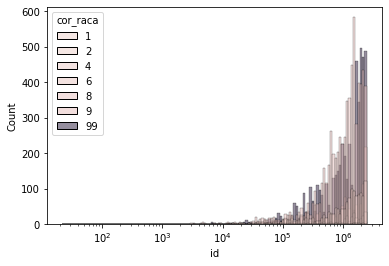

==================Categoria 8


count    6.618000e+03
mean     1.203838e+06
std      6.503383e+05
min      1.150000e+02
25%      6.572588e+05
50%      1.217317e+06
75%      1.712478e+06
max      2.459818e+06
Name: id, dtype: float64

==================Categoria 99


count    4.920000e+03
mean     1.314901e+06
std      7.345987e+05
min      1.187000e+03
25%      7.133215e+05
50%      1.309692e+06
75%      2.006448e+06
max      2.459844e+06
Name: id, dtype: float64

==================Categoria 9


count    1.618000e+03
mean     1.162267e+06
std      7.893900e+05
min      1.671000e+03
25%      3.613940e+05
50%      1.128056e+06
75%      1.875893e+06
max      2.457804e+06
Name: id, dtype: float64

==================Categoria 2


count    1.442000e+03
mean     1.156816e+06
std      7.284174e+05
min      2.200000e+01
25%      5.067272e+05
50%      1.207900e+06
75%      1.754894e+06
max      2.458733e+06
Name: id, dtype: float64

==================Categoria 4


count    3.070000e+02
mean     1.183979e+06
std      7.742214e+05
min      3.660000e+03
25%      4.006645e+05
50%      1.279598e+06
75%      1.773360e+06
max      2.426413e+06
Name: id, dtype: float64

==================Categoria 6


count    7.400000e+01
mean     1.073229e+06
std      7.899270e+05
min      1.761000e+03
25%      3.447732e+05
50%      8.819220e+05
75%      1.799001e+06
max      2.416691e+06
Name: id, dtype: float64

==================Categoria 1


count    2.100000e+01
mean     1.303477e+06
std      6.786010e+05
min      1.201830e+05
25%      7.853600e+05
50%      1.485944e+06
75%      1.753205e+06
max      2.172930e+06
Name: id, dtype: float64

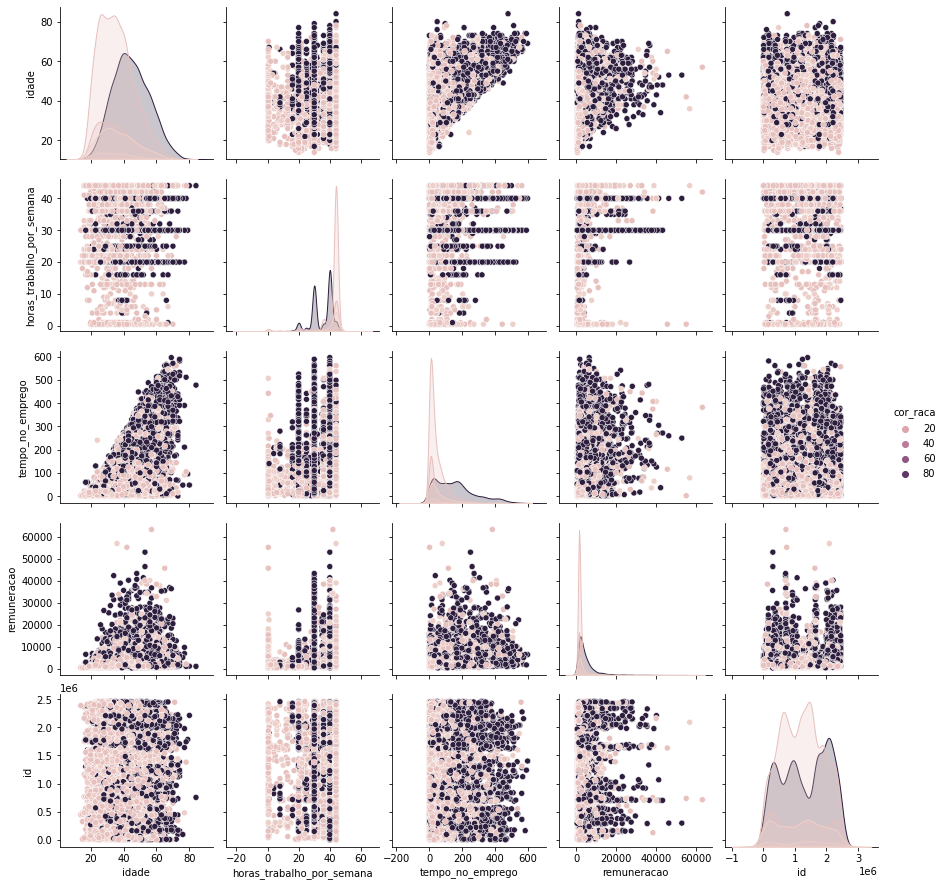

================escolaridade=============


escolaridade  escolaridade
7           7994      0.532933
9           3550      0.236667
5            951      0.063400
6            738      0.049200
4            582      0.038800
8            446      0.029733
2            308      0.020533
3            215      0.014333
10            96      0.006400
11            67      0.004467
1             53      0.003533

Grafico de distribuição de idade com relação a escolaridade


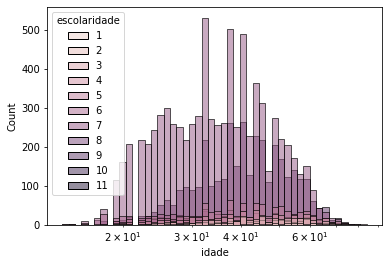

==================Categoria 7


count    7994.000000
mean       36.308231
std        11.048829
min        14.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        79.000000
Name: idade, dtype: float64

==================Categoria 9


count    3550.000000
mean       42.072113
std        10.391350
min        20.000000
25%        34.000000
50%        41.000000
75%        49.000000
max        77.000000
Name: idade, dtype: float64

==================Categoria 4


count    582.000000
mean      43.077320
std       13.338408
min       14.000000
25%       33.000000
50%       42.000000
75%       53.000000
max       74.000000
Name: idade, dtype: float64

==================Categoria 6


count    738.000000
mean      35.289973
std       12.667223
min       15.000000
25%       25.000000
50%       34.000000
75%       44.000000
max       78.000000
Name: idade, dtype: float64

==================Categoria 8


count    446.000000
mean      33.127803
std       10.979216
min       18.000000
25%       24.250000
50%       31.000000
75%       39.000000
max       72.000000
Name: idade, dtype: float64

==================Categoria 2


count    308.000000
mean      44.772727
std       11.633392
min       19.000000
25%       36.000000
50%       45.000000
75%       54.000000
max       73.000000
Name: idade, dtype: float64

==================Categoria 5


count    951.000000
mean      41.013670
std       12.092574
min       15.000000
25%       32.000000
50%       40.000000
75%       50.000000
max       74.000000
Name: idade, dtype: float64

==================Categoria 10


count    96.000000
mean     42.625000
std       9.276172
min      26.000000
25%      35.000000
50%      42.500000
75%      50.000000
max      68.000000
Name: idade, dtype: float64

==================Categoria 3


count    215.000000
mean      44.139535
std       12.219147
min       20.000000
25%       35.000000
50%       43.000000
75%       53.000000
max       84.000000
Name: idade, dtype: float64

==================Categoria 11


count    67.000000
mean     42.208955
std      10.684933
min      24.000000
25%      33.500000
50%      40.000000
75%      51.500000
max      65.000000
Name: idade, dtype: float64

==================Categoria 1


count    53.000000
mean     45.056604
std      12.740630
min      19.000000
25%      35.000000
50%      45.000000
75%      54.000000
max      80.000000
Name: idade, dtype: float64

Grafico de distribuição de horas_trabalho_por_semana com relação a escolaridade


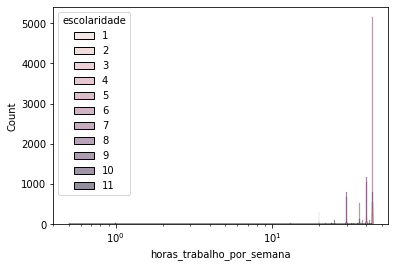

==================Categoria 7


count    7994.000000
mean       40.570178
std         6.655446
min         0.500000
25%        40.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 9


count    3550.000000
mean       35.034648
std         9.120646
min         0.500000
25%        30.000000
50%        40.000000
75%        40.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 4


count    582.000000
mean      40.839347
std        6.223288
min        0.500000
25%       40.000000
50%       44.000000
75%       44.000000
max       44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 6


count    738.000000
mean      40.168699
std        7.779243
min        0.500000
25%       40.000000
50%       44.000000
75%       44.000000
max       44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 8


count    446.000000
mean      39.512332
std        8.277380
min        0.500000
25%       40.000000
50%       44.000000
75%       44.000000
max       44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 2


count    308.000000
mean      41.737013
std        5.070094
min        8.000000
25%       40.000000
50%       44.000000
75%       44.000000
max       44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 5


count    951.000000
mean      40.256046
std        6.426295
min        0.500000
25%       40.000000
50%       44.000000
75%       44.000000
max       44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 10


count    96.000000
mean     34.776042
std      10.705844
min       0.500000
25%      30.000000
50%      40.000000
75%      40.000000
max      44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 3


count    215.000000
mean      41.753488
std        4.773337
min       20.000000
25%       40.000000
50%       44.000000
75%       44.000000
max       44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 11


count    67.000000
mean     33.253731
std       9.014035
min       6.000000
25%      30.000000
50%      40.000000
75%      40.000000
max      44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 1


count    53.000000
mean     41.698113
std       5.179787
min      16.000000
25%      40.000000
50%      44.000000
75%      44.000000
max      44.000000
Name: horas_trabalho_por_semana, dtype: float64

Grafico de distribuição de tempo_no_emprego com relação a escolaridade


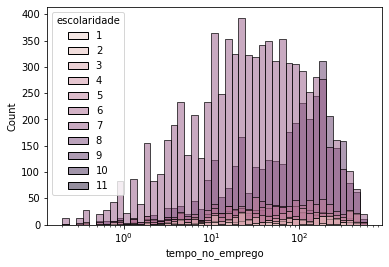

==================Categoria 7


count    7994.000000
mean       65.777283
std        88.747400
min         0.200000
25%        10.000000
50%        28.900000
75%        84.900000
max       596.500000
Name: tempo_no_emprego, dtype: float64

==================Categoria 9


count    3550.000000
mean      118.116394
std       109.104916
min         0.200000
25%        23.900000
50%        91.800000
75%       177.900000
max       581.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 4


count    582.000000
mean     107.690378
std      129.253847
min        0.200000
25%       14.750000
50%       49.800000
75%      154.025000
max      566.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 6


count    738.000000
mean      66.624526
std       89.836951
min        0.300000
25%       10.900000
50%       32.900000
75%       86.625000
max      589.300000
Name: tempo_no_emprego, dtype: float64

==================Categoria 8


count    446.000000
mean      70.217040
std       96.523672
min        0.200000
25%       11.800000
50%       30.150000
75%       95.900000
max      561.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 2


count    308.000000
mean      85.743182
std      105.392259
min        0.700000
25%       11.700000
50%       32.100000
75%      131.250000
max      461.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 5


count    951.000000
mean      93.142797
std      109.983545
min        0.200000
25%       14.500000
50%       46.300000
75%      138.400000
max      536.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 10


count     96.000000
mean     123.220833
std      110.046230
min        0.900000
25%       41.150000
50%       93.650000
75%      174.025000
max      472.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 3


count    215.000000
mean     104.303721
std      107.189899
min        0.700000
25%       16.100000
50%       66.900000
75%      172.250000
max      477.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 11


count     67.000000
mean      94.417910
std       91.444287
min        0.900000
25%       23.100000
50%       76.400000
75%      132.400000
max      429.500000
Name: tempo_no_emprego, dtype: float64

==================Categoria 1


count     53.000000
mean      78.169811
std       94.839465
min        0.500000
25%       11.400000
50%       32.900000
75%      106.200000
max      335.900000
Name: tempo_no_emprego, dtype: float64

Grafico de distribuição de remuneracao com relação a escolaridade


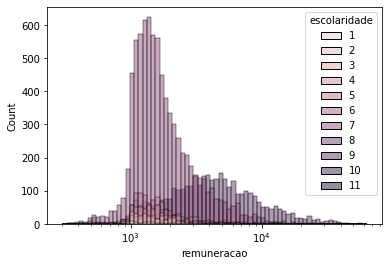

==================Categoria 7


count     7994.000000
mean      2129.667009
std       1915.575029
min        320.270000
25%       1217.657500
50%       1561.805000
75%       2277.807500
max      38414.330000
Name: remuneracao, dtype: float64

==================Categoria 9


count     3550.000000
mean      5943.682983
std       5909.407599
min        331.300000
25%       2501.625000
50%       4160.910000
75%       7091.835000
max      63218.070000
Name: remuneracao, dtype: float64

==================Categoria 4


count      582.000000
mean      1836.522302
std       1466.276857
min        301.430000
25%       1188.122500
50%       1482.925000
75%       1978.005000
max      23001.940000
Name: remuneracao, dtype: float64

==================Categoria 6


count      738.000000
mean      1633.610000
std       1105.923764
min        304.290000
25%       1098.240000
50%       1371.145000
75%       1814.300000
max      12776.410000
Name: remuneracao, dtype: float64

==================Categoria 8


count      446.000000
mean      2717.242377
std       2429.659269
min        369.780000
25%       1260.325000
50%       1783.715000
75%       3104.570000
max      18078.820000
Name: remuneracao, dtype: float64

==================Categoria 2


count     308.000000
mean     1731.762565
std      1083.165195
min       490.160000
25%      1146.920000
50%      1435.110000
75%      1956.602500
max      9746.980000
Name: remuneracao, dtype: float64

==================Categoria 5


count      951.000000
mean      1865.582755
std       1461.797576
min        348.260000
25%       1191.335000
50%       1482.250000
75%       1978.850000
max      16538.670000
Name: remuneracao, dtype: float64

==================Categoria 10


count       96.000000
mean      8552.853542
std       6870.954334
min        343.830000
25%       4121.010000
50%       7248.580000
75%      10866.965000
max      37750.080000
Name: remuneracao, dtype: float64

==================Categoria 3


count     215.000000
mean     1717.659628
std       832.442563
min       507.100000
25%      1181.870000
50%      1458.620000
75%      2020.845000
max      6784.720000
Name: remuneracao, dtype: float64

==================Categoria 11


count       67.000000
mean      7925.665075
std       7556.765470
min       1312.340000
25%       3040.860000
50%       5725.210000
75%      10113.910000
max      40019.740000
Name: remuneracao, dtype: float64

==================Categoria 1


count      53.000000
mean     1604.212075
std      1252.568027
min       829.590000
25%      1078.070000
50%      1293.390000
75%      1599.230000
max      9454.460000
Name: remuneracao, dtype: float64

Grafico de distribuição de id com relação a escolaridade


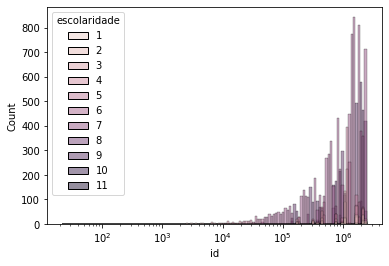

==================Categoria 7


count    7.994000e+03
mean     1.193990e+06
std      6.962230e+05
min      4.760700e+04
25%      5.861560e+05
50%      1.321488e+06
75%      1.796894e+06
max      2.416308e+06
Name: id, dtype: float64

==================Categoria 9


count    3.550000e+03
mean     1.418520e+06
std      7.397548e+05
min      1.482400e+05
25%      7.404125e+05
50%      1.637279e+06
75%      2.063858e+06
max      2.458758e+06
Name: id, dtype: float64

==================Categoria 4


count    5.820000e+02
mean     1.074080e+06
std      6.427402e+05
min      1.064300e+04
25%      4.539172e+05
50%      1.130221e+06
75%      1.155274e+06
max      2.356035e+06
Name: id, dtype: float64

==================Categoria 6


count    7.380000e+02
mean     1.040800e+06
std      6.784884e+05
min      3.236500e+04
25%      4.793232e+05
50%      1.232656e+06
75%      1.262556e+06
max      2.363022e+06
Name: id, dtype: float64

==================Categoria 8


count    4.460000e+02
mean     1.302112e+06
std      7.473103e+05
min      1.437320e+05
25%      6.901488e+05
50%      1.597276e+06
75%      1.962467e+06
max      2.420201e+06
Name: id, dtype: float64

==================Categoria 2


count    3.080000e+02
mean     1.110417e+06
std      6.793339e+05
min      6.480000e+02
25%      7.532495e+05
50%      1.093028e+06
75%      1.694754e+06
max      2.354220e+06
Name: id, dtype: float64

==================Categoria 5


count    9.510000e+02
mean     1.119505e+06
std      5.991057e+05
min      2.041200e+04
25%      7.618065e+05
50%      1.183231e+06
75%      1.222835e+06
max      2.360055e+06
Name: id, dtype: float64

==================Categoria 10


count    9.600000e+01
mean     1.333769e+06
std      7.641393e+05
min      1.719370e+05
25%      6.718955e+05
50%      1.689906e+06
75%      2.092931e+06
max      2.459462e+06
Name: id, dtype: float64

==================Categoria 3


count    2.150000e+02
mean     1.001410e+06
std      6.310371e+05
min      6.384000e+03
25%      4.446615e+05
50%      1.106445e+06
75%      1.116102e+06
max      2.354994e+06
Name: id, dtype: float64

==================Categoria 11


count    6.700000e+01
mean     1.213049e+06
std      5.621401e+05
min      1.725650e+05
25%      8.669410e+05
50%      1.030578e+06
75%      1.692125e+06
max      2.459844e+06
Name: id, dtype: float64

==================Categoria 1


count    5.300000e+01
mean     1.311536e+06
std      6.864341e+05
min      2.200000e+01
25%      1.078253e+06
50%      1.080334e+06
75%      2.157335e+06
max      2.352223e+06
Name: id, dtype: float64

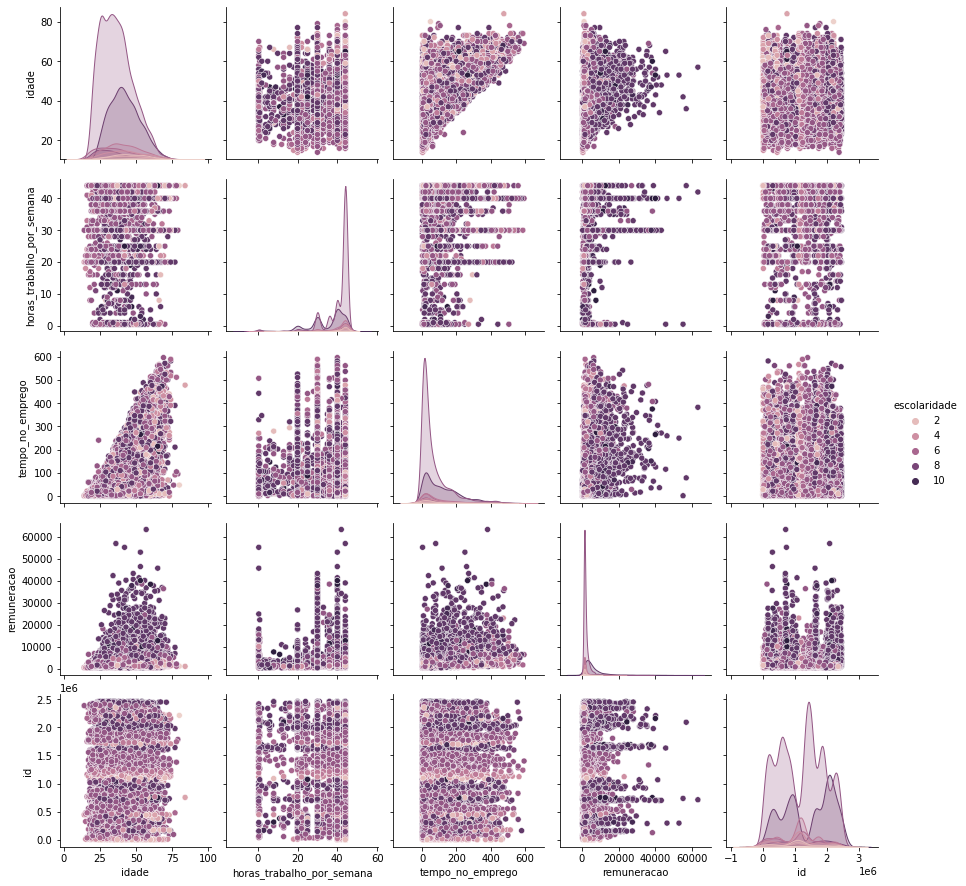

================portador_de_deficiencia=============


portador_de_deficiencia  portador_de_deficiencia
0                    14882                 0.992133
1                      118                 0.007867

Grafico de distribuição de idade com relação a portador_de_deficiencia


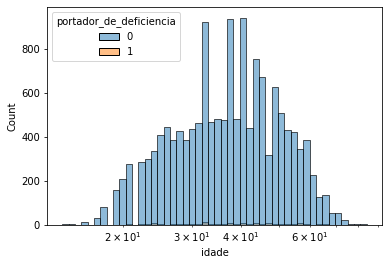

==================Categoria 0


count    14882.000000
mean        38.462841
std         11.603413
min         14.000000
25%         29.000000
50%         37.000000
75%         46.000000
max         84.000000
Name: idade, dtype: float64

==================Categoria 1


count    118.000000
mean      39.677966
std       10.636079
min       21.000000
25%       32.000000
50%       39.000000
75%       47.000000
max       65.000000
Name: idade, dtype: float64

Grafico de distribuição de horas_trabalho_por_semana com relação a portador_de_deficiencia


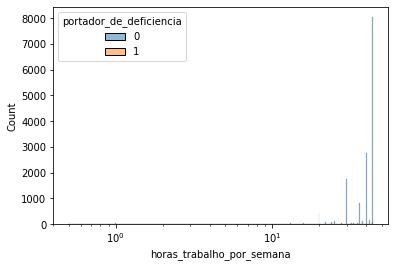

==================Categoria 0


count    14882.000000
mean        39.163788
std          7.773692
min          0.500000
25%         36.000000
50%         44.000000
75%         44.000000
max         44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 1


count    118.000000
mean      40.533898
std        6.502705
min       12.000000
25%       40.000000
50%       44.000000
75%       44.000000
max       44.000000
Name: horas_trabalho_por_semana, dtype: float64

Grafico de distribuição de tempo_no_emprego com relação a portador_de_deficiencia


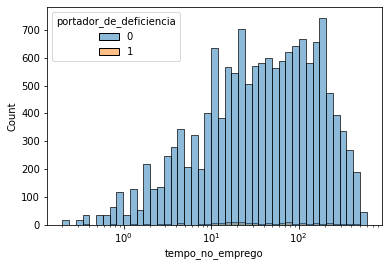

==================Categoria 0


count    14882.000000
mean        83.234256
std        100.758027
min          0.200000
25%         12.700000
50%         40.700000
75%        119.100000
max        596.500000
Name: tempo_no_emprego, dtype: float64

==================Categoria 1


count    118.000000
mean      78.960169
std      100.924772
min        0.400000
25%       14.675000
50%       34.300000
75%      101.600000
max      456.800000
Name: tempo_no_emprego, dtype: float64

Grafico de distribuição de remuneracao com relação a portador_de_deficiencia


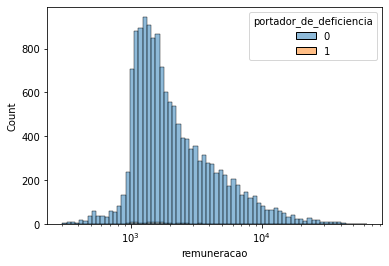

==================Categoria 0


count    14882.000000
mean      3052.892448
std       3788.355942
min        301.430000
25%       1275.395000
50%       1766.955000
75%       3224.260000
max      63218.070000
Name: remuneracao, dtype: float64

==================Categoria 1


count      118.000000
mean      2472.907966
std       3002.832660
min        535.320000
25%       1187.665000
50%       1605.675000
75%       2562.082500
max      21293.160000
Name: remuneracao, dtype: float64

Grafico de distribuição de id com relação a portador_de_deficiencia


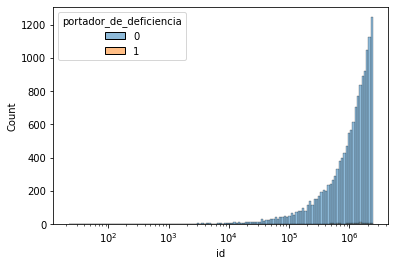

==================Categoria 0


count    1.488200e+04
mean     1.230457e+06
std      7.085647e+05
min      2.200000e+01
25%      6.228928e+05
50%      1.238951e+06
75%      1.842519e+06
max      2.459844e+06
Name: id, dtype: float64

==================Categoria 1


count    1.180000e+02
mean     1.216970e+06
std      6.532152e+05
min      4.692600e+04
25%      6.533912e+05
50%      1.209732e+06
75%      1.734796e+06
max      2.458375e+06
Name: id, dtype: float64

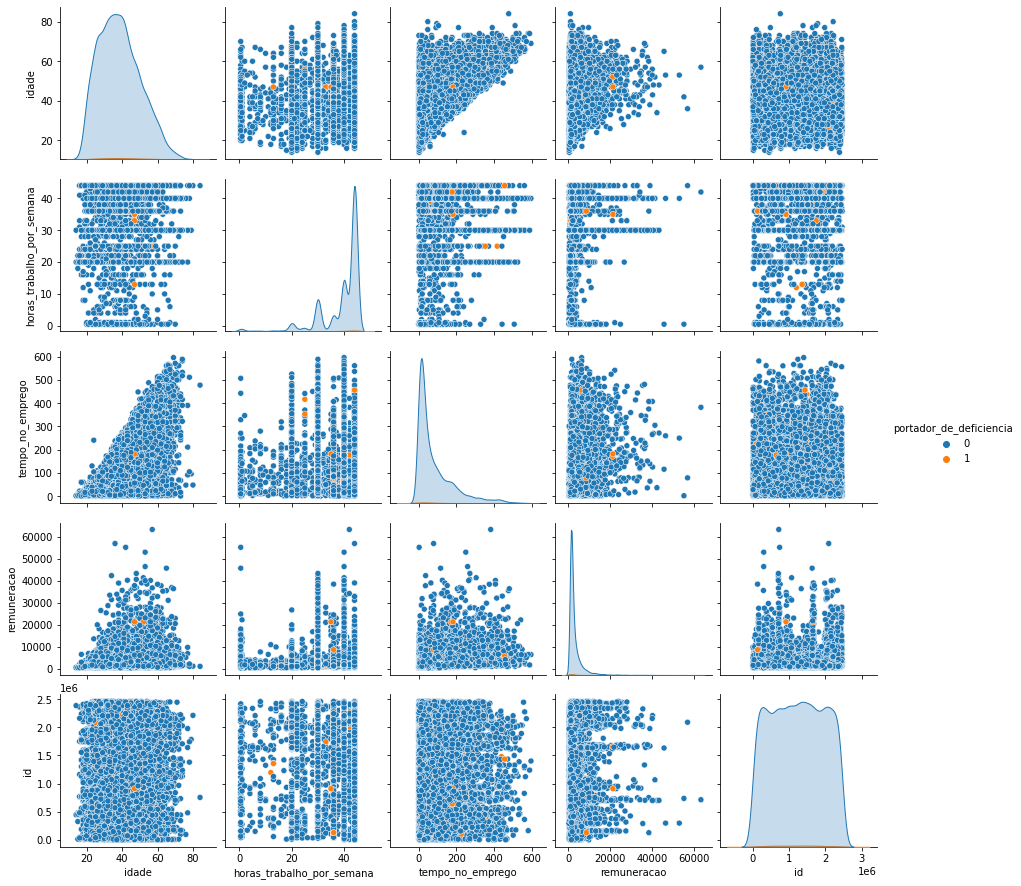

================tamanho_da_empresa=============


tamanho_da_empresa  tamanho_da_empresa
10                4736            0.315733
7                 1572            0.104800
9                 1506            0.100400
5                 1491            0.099400
8                 1342            0.089467
4                 1203            0.080200
3                 1105            0.073667
6                 1054            0.070267
2                  991            0.066067

Grafico de distribuição de idade com relação a tamanho_da_empresa


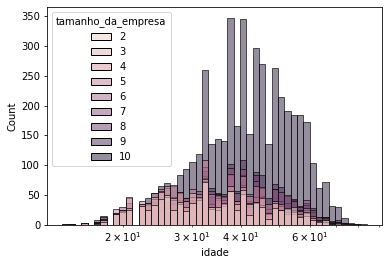

==================Categoria 10


count    4736.000000
mean       42.432855
std        11.268731
min        15.000000
25%        34.000000
50%        42.000000
75%        50.000000
max        84.000000
Name: idade, dtype: float64

==================Categoria 3


count    1105.000000
mean       35.046154
std        11.021251
min        17.000000
25%        26.000000
50%        33.000000
75%        42.000000
max        78.000000
Name: idade, dtype: float64

==================Categoria 7


count    1572.000000
mean       37.458651
std        11.592385
min        14.000000
25%        28.000000
50%        36.000000
75%        45.000000
max        80.000000
Name: idade, dtype: float64

==================Categoria 8


count    1342.000000
mean       38.263785
std        11.679431
min        15.000000
25%        29.000000
50%        37.000000
75%        46.000000
max        74.000000
Name: idade, dtype: float64

==================Categoria 5


count    1491.000000
mean       35.238766
std        10.651748
min        16.000000
25%        27.000000
50%        34.000000
75%        42.000000
max        77.000000
Name: idade, dtype: float64

==================Categoria 4


count    1203.000000
mean       34.646717
std        10.790273
min        17.000000
25%        26.000000
50%        33.000000
75%        41.000000
max        73.000000
Name: idade, dtype: float64

==================Categoria 6


count    1054.000000
mean       36.320683
std        11.181130
min        15.000000
25%        28.000000
50%        35.000000
75%        43.000000
max        72.000000
Name: idade, dtype: float64

==================Categoria 2


count    991.000000
mean      35.381433
std       11.116273
min       16.000000
25%       26.000000
50%       33.000000
75%       42.000000
max       73.000000
Name: idade, dtype: float64

==================Categoria 9


count    1506.000000
mean       39.573041
std        11.125334
min        14.000000
25%        32.000000
50%        39.000000
75%        47.000000
max        79.000000
Name: idade, dtype: float64

Grafico de distribuição de horas_trabalho_por_semana com relação a tamanho_da_empresa


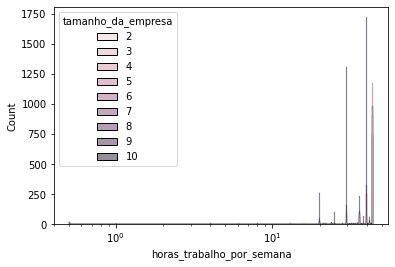

==================Categoria 10


count    4736.000000
mean       36.124050
std         6.954914
min         0.500000
25%        30.000000
50%        40.000000
75%        40.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 3


count    1105.000000
mean       42.587783
std         5.082872
min         0.500000
25%        44.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 7


count    1572.000000
mean       39.894084
std         8.113400
min         0.500000
25%        40.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 8


count    1342.000000
mean       39.547317
std         7.985900
min         0.500000
25%        40.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 5


count    1491.000000
mean       40.881958
std         8.404746
min         0.500000
25%        44.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 4


count    1203.000000
mean       41.709061
std         6.737080
min         0.500000
25%        44.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 6


count    1054.000000
mean       40.118596
std         8.732882
min         0.500000
25%        40.000000
50%        44.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 2


count    991.000000
mean      42.565590
std        5.644228
min        0.500000
25%       44.000000
50%       44.000000
75%       44.000000
max       44.000000
Name: horas_trabalho_por_semana, dtype: float64

==================Categoria 9


count    1506.000000
mean       38.573041
std         8.288104
min         0.500000
25%        36.000000
50%        40.000000
75%        44.000000
max        44.000000
Name: horas_trabalho_por_semana, dtype: float64

Grafico de distribuição de tempo_no_emprego com relação a tamanho_da_empresa


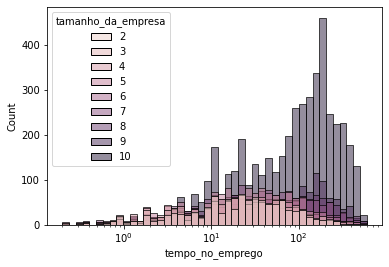

==================Categoria 10


count    4736.000000
mean      130.468518
std       119.324622
min         0.200000
25%        27.125000
50%       101.800000
75%       188.925000
max       596.500000
Name: tempo_no_emprego, dtype: float64

==================Categoria 3


count    1105.000000
mean       41.887059
std        54.654089
min         0.200000
25%         7.800000
50%        21.500000
75%        54.900000
max       460.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 7


count    1572.000000
mean       66.832761
std        87.534401
min         0.200000
25%        10.600000
50%        30.850000
75%        85.750000
max       561.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 8


count    1342.000000
mean       83.657377
std       101.259556
min         0.300000
25%        12.450000
50%        42.900000
75%       122.125000
max       581.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 5


count    1491.000000
mean       46.460832
std        64.089630
min         0.200000
25%         8.500000
50%        23.300000
75%        59.800000
max       536.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 4


count    1203.000000
mean       40.754530
std        56.461094
min         0.200000
25%         6.950000
50%        20.400000
75%        53.800000
max       447.900000
Name: tempo_no_emprego, dtype: float64

==================Categoria 6


count    1054.000000
mean       55.153416
std        75.985261
min         0.200000
25%         9.725000
50%        25.600000
75%        70.900000
max       517.200000
Name: tempo_no_emprego, dtype: float64

==================Categoria 2


count    991.000000
mean      40.021998
std       50.901571
min        0.300000
25%        9.400000
50%       22.900000
75%       51.700000
max      442.800000
Name: tempo_no_emprego, dtype: float64

==================Categoria 9


count    1506.000000
mean       99.868393
std       106.293481
min         0.200000
25%        17.900000
50%        59.750000
75%       154.575000
max       561.600000
Name: tempo_no_emprego, dtype: float64

Grafico de distribuição de remuneracao com relação a tamanho_da_empresa


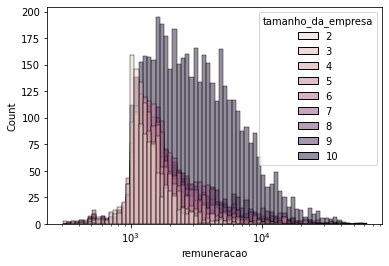

==================Categoria 10


count     4736.000000
mean      4352.395574
std       4648.703029
min        331.300000
25%       1672.280000
50%       2850.080000
75%       5233.567500
max      63218.070000
Name: remuneracao, dtype: float64

==================Categoria 3


count     1105.000000
mean      1699.714181
std       1405.911986
min        343.840000
25%       1128.830000
50%       1331.510000
75%       1728.360000
max      22445.450000
Name: remuneracao, dtype: float64

==================Categoria 7


count     1572.000000
mean      2638.931202
std       3047.152235
min        343.830000
25%       1286.640000
50%       1707.880000
75%       2792.167500
max      40067.810000
Name: remuneracao, dtype: float64

==================Categoria 8


count     1342.000000
mean      3327.861349
std       4552.487616
min        410.210000
25%       1375.910000
50%       1817.175000
75%       3078.642500
max      56849.230000
Name: remuneracao, dtype: float64

==================Categoria 5


count     1491.000000
mean      2130.988759
std       2263.882104
min        301.430000
25%       1196.370000
50%       1508.180000
75%       2179.615000
max      32972.390000
Name: remuneracao, dtype: float64

==================Categoria 4


count     1203.000000
mean      1947.918371
std       2169.936873
min        326.150000
25%       1156.310000
50%       1429.020000
75%       1939.315000
max      38947.500000
Name: remuneracao, dtype: float64

==================Categoria 6


count     1054.000000
mean      2460.218605
std       3261.018678
min        327.040000
25%       1220.212500
50%       1567.620000
75%       2460.935000
max      40019.740000
Name: remuneracao, dtype: float64

==================Categoria 2


count      991.000000
mean      1483.223956
std        994.843944
min        375.510000
25%       1058.605000
50%       1230.160000
75%       1550.225000
max      13582.690000
Name: remuneracao, dtype: float64

==================Categoria 9


count     1506.000000
mean      3343.847125
std       4175.008030
min        414.680000
25%       1387.857500
50%       1903.375000
75%       3582.212500
max      55122.470000
Name: remuneracao, dtype: float64

Grafico de distribuição de id com relação a tamanho_da_empresa


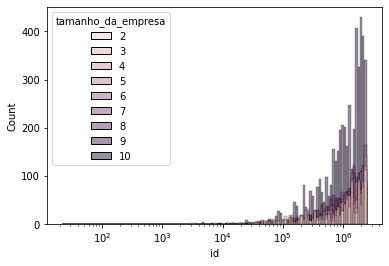

==================Categoria 10


count    4.736000e+03
mean     1.274428e+06
std      6.938693e+05
min      1.187000e+03
25%      7.140892e+05
50%      1.283059e+06
75%      1.875917e+06
max      2.459844e+06
Name: id, dtype: float64

==================Categoria 3


count    1.105000e+03
mean     1.182300e+06
std      7.399644e+05
min      2.200000e+01
25%      5.010280e+05
50%      1.225583e+06
75%      1.851763e+06
max      2.431983e+06
Name: id, dtype: float64

==================Categoria 7


count    1.572000e+03
mean     1.244508e+06
std      7.050278e+05
min      4.953000e+03
25%      6.353470e+05
50%      1.251567e+06
75%      1.834885e+06
max      2.459357e+06
Name: id, dtype: float64

==================Categoria 8


count    1.342000e+03
mean     1.223045e+06
std      6.772663e+05
min      1.397000e+03
25%      6.726315e+05
50%      1.232282e+06
75%      1.774768e+06
max      2.457533e+06
Name: id, dtype: float64

==================Categoria 5


count    1.491000e+03
mean     1.239228e+06
std      7.250407e+05
min      6.480000e+02
25%      5.834510e+05
50%      1.272196e+06
75%      1.878648e+06
max      2.459462e+06
Name: id, dtype: float64

==================Categoria 4


count    1.203000e+03
mean     1.175759e+06
std      7.505091e+05
min      3.660000e+03
25%      4.721855e+05
50%      1.157728e+06
75%      1.845658e+06
max      2.458733e+06
Name: id, dtype: float64

==================Categoria 6


count    1.054000e+03
mean     1.215189e+06
std      7.118668e+05
min      1.671000e+03
25%      5.985858e+05
50%      1.222815e+06
75%      1.802904e+06
max      2.457687e+06
Name: id, dtype: float64

==================Categoria 2


count    9.910000e+02
mean     1.203805e+06
std      7.624755e+05
min      3.185000e+03
25%      4.344640e+05
50%      1.214509e+06
75%      1.866687e+06
max      2.448509e+06
Name: id, dtype: float64

==================Categoria 9


count    1.506000e+03
mean     1.181627e+06
std      6.577671e+05
min      4.770000e+02
25%      6.280788e+05
50%      1.164882e+06
75%      1.728026e+06
max      2.456732e+06
Name: id, dtype: float64

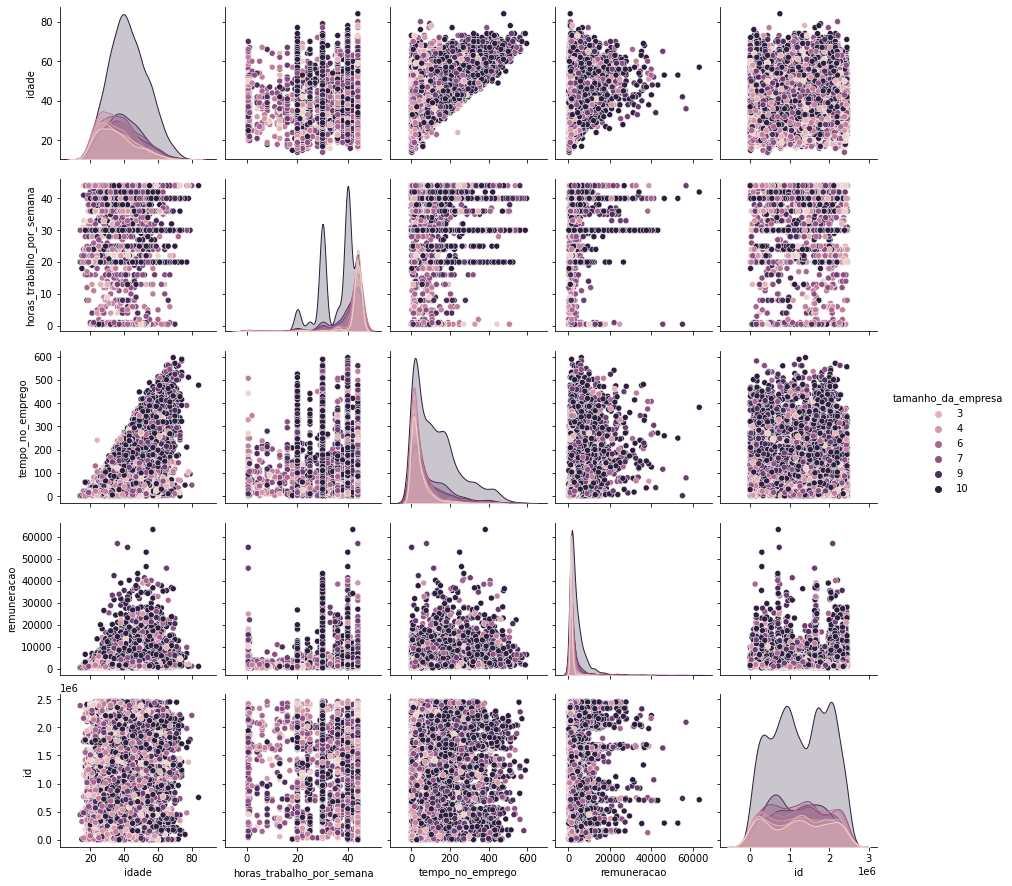

In [7]:
def tira_0(x):
  if x == 0:
    return 0.5
  else:
    return x
cat = ['sexo', 'faixa_etaria', 'cor_raca', 'escolaridade', 'portador_de_deficiencia', 'tamanho_da_empresa']
num = dados.drop(cat, axis = 1).columns.copy()
palette=sns.color_palette("Paired")
dad = dados.copy()
for i in cat:
  p = num.to_list().copy()
  print(f'================{i}=============')
  display(pd.concat([dados[i].value_counts(), dados[i].value_counts(normalize = True)], axis = 1))
  for j in num:
    if 0 in dad[j].unique():
      dad[j] = dad[j].apply(tira_0)
    else:
      pass
    print(f'Grafico de distribuição de {j} com relação a {i}')
    fig = px.histogram(dados, x = j, color = i)
    fig.show()
    dad[dad[j]==0][j] = 10
    sns.histplot(data = dad, x = j, hue = i, log_scale = True, )
    sns.histplot(palette=palette)
    plt.show()
    for k in dad[i].unique():
      print(f'==================Categoria {k}')
      filt = dad[dad[i]==k].copy()
      display(filt[j].describe())

  p.append(i)
  sns.pairplot(data = dad[p], hue = i)
  plt.show()
  

Sexo:

Tem 58% de homens
Não é nitida a diferença de idade entre eles
A maior parte das idades é entre 25 e 50 anos
A maior parte das pessoas trabalham 44h
Em 44h a proporção de homens pra mulher é de 75%
Já para 40h e 30h temos mais mulheres do que homens
A maioria das pessoas fica até 100 dias no emprego
Acima disso é bem incomum e aparentemente mulheres ficam mais tempo
Mulheres ficam mais tempo no emprego
Homens aparentam ganhar um pouco mais (mas nao muito) Na verdade acredito ser igual



Faixa etaria:

Pessoas de maior faixa etaria tendem a ficar mais tempo no emprego
Pesoas das categorias 1,2 e 7 e 8 sao as que trabalham menos horas
Quanto maior a faixa etaria maior o tempo que a pessoa permanece no emprego
Pessoas da 2° faixa ganhm em geral pouco, mas sao poucos dados
Pessoas da 3° faixa ganham em media 1000 a 1300 reais (curva normal)
Pessoas da 4° faixa ganham parecido com da 3°
Pessoas da 5° faixa tambem`
Pessoas da 6° tambem
Pessoas da 7° parecem ganhar um pouco mais, porque possui mais pessoas com salarios altos
Pessoas da 8° tambem parecem bem similares a 3° com alguns salarios bem altos
Pessoas com uma idade media aparentam ter maior remuneração (40 a 60 anos)
Pessoas com maior faixa etaria ganham mais


Raça:

a raça 8 e 99 sao as mais frequentes disparado
logo apos a 9 e a 2 
Pessoas da raça 99 possuem em geral uma idade maior
Pessoas de idade mais avançada parecem ser da raça 99
Pessoas das raças 8, 9 e 2 e 4 e 6 parecem trabalhar mais que 40 h
Pessoas da raça 99 trabalham 30h ou 40h em sua maioria
Pessoas da raça 99 ficam mais tempo no emprego
Pessoas da categoria 9 sao as que menos ficam no emprego
Pessoas da raça 1 ganham menos de 1500 reais e alguns pontos mais alto proximo de 10
Raça 2 ganham entre 1220 a 1400 em maioria, mas tem pontos maiores indo até 50k
Raça 4 entre 1200 e 1400 esta a maioria e possui alguns poucos pontos entre 3 e 10k
Raça 6 entre 1000 e 1200 e alguns pontos entre 3 e 10k e um outlier em 40k
Raça 8 entre 1200 e 1400 com alguns pontos maiores
Raça 9 entre 1000 e 1800 com alguns pontos entre 3 e 8k
Raça 99 com valores mais altos em geral, entre 1400 e 1800 e varios valores entre 2 e 10k e alguns acima disso, é a raça que mais ganha
Raça 9 e raça 8 e 4 e 6 ganham muito parecido, raça 2 ganha mais que elas e 99 muito mais




Escolaridade:

7 é a grande maioria, logo em seguida 9
7 e 6 possuem idades semelhantes, 9 e 4 idades semelhantes
8 sao mais novos
Pessoas de escolaridade 1, 2 e 3 tendem a possuir mais pessoas com idades avançadas
Pessoas com idade 7 pra cima parecem ter mesmo padrao de idade
Pessoas de menor escolaridade aparentam trabalhar mais que 40h e pessoas com escolaridade maior trabalham 40h ou menos
Pessoas com escolaridade media sao as que tendem a ficar menos tempo no emprego (em comparação as com maior escolaridade ou baixa)
Pessoas com menor escolaridade ganham menos
Pessoas com muita escolaridade sao as que ganham mais



Deficiencia

POucas pessoas possuem deficiencia (>1%)
Pessoas com deficiencia trabalham muito mais
Em geral pessoas com deficiencia dificilmente ganham muito
e ganham abaixo da media


Tamanho da empresa:

a grande maioria trabalha emempresas tamanho 10 e depois é bem equilibrado
Empresas de tamanho 10 parecem ter idades mais avançadas que o resto
Em empresas maiores a carga horaria é menor (10)
Aparentemente so empresas de tamanho 10 a carga horaria reduz significativamente, o resto é meio igual
Em empresas maiores que 7 o tempo no emprego é maior com forte aumento em empresas 10
As empresas em geral aparentam pagar de forma muito parecida, sem muita diferença exceto pela de tamanho 10 e um pouco maiores


**VARIAVEIS MAIS IMPORTANTES NA REMUNERAÇAO**

Faixa etaria; Raça; Escolaridade; Tamanho da Empresa e tempo no emprego

In [8]:
dados[dados['remuneracao']>2000].describe()

sexo        idade  ...   remuneracao            id
count  6480.000000  6480.000000  ...   6480.000000  6.480000e+03
mean      1.418981    42.308488  ...   5285.594931  1.278953e+06
std       0.493430    10.727772  ...   4917.305925  7.201356e+05
min       1.000000    17.000000  ...   2000.240000  4.770000e+02
25%       1.000000    34.000000  ...   2569.532500  6.770045e+05
50%       1.000000    41.000000  ...   3626.360000  1.299428e+06
75%       2.000000    50.000000  ...   5928.855000  1.980224e+06
max       2.000000    78.000000  ...  63218.070000  2.459844e+06

[8 rows x 11 columns]

In [9]:
dados[dados['remuneracao']<2000].describe()

sexo        idade  ...  remuneracao            id
count  8520.000000  8520.000000  ...  8520.000000  8.520000e+03
mean      1.418075    35.554812  ...  1346.748052  1.193386e+06
std       0.493272    11.381075  ...   324.352304  6.966313e+05
min       1.000000    14.000000  ...   301.430000  2.200000e+01
25%       1.000000    26.000000  ...  1119.332500  5.853472e+05
50%       1.000000    34.000000  ...  1328.735000  1.202310e+06
75%       2.000000    43.000000  ...  1586.645000  1.782057e+06
max       2.000000    84.000000  ...  1999.490000  2.459462e+06

[8 rows x 11 columns]

In [10]:
dados[num].corr()

idade  ...        id
idade                      1.000000  ...  0.038961
horas_trabalho_por_semana -0.170258  ... -0.074172
tempo_no_emprego           0.598579  ...  0.034632
remuneracao                0.255834  ...  0.056760
id                         0.038961  ...  1.000000

[5 rows x 5 columns]

## Avaliando preliminarmente quais características são mais importantes para alguns modelos

In [11]:
from sklearn.model_selection import train_test_split, cross_validate
dados_ = dados.drop('remuneracao', axis = 1).copy()
target = dados.remuneracao

X, X_val, y, y_val = train_test_split(dados_,target, test_size = 0.3, random_state = 42)
treino = pd.concat([X, y], axis = 1)
treino[num].corr()

idade  ...        id
idade                      1.000000  ...  0.045260
horas_trabalho_por_semana -0.184010  ... -0.075523
tempo_no_emprego           0.596863  ...  0.040079
remuneracao                0.266907  ...  0.065678
id                         0.045260  ...  1.000000

[5 rows x 5 columns]

1532.774005288501
[00:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1492.632817595893
1473.5785006327335


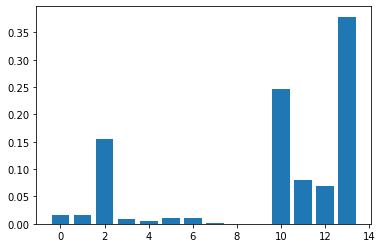

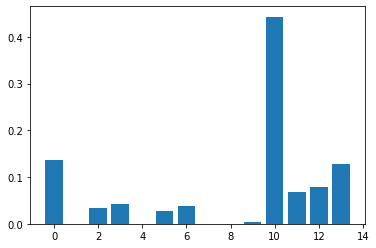

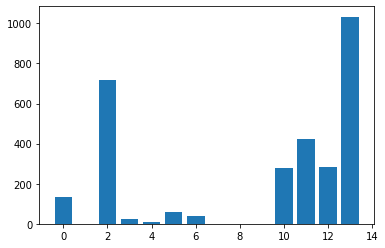

Index(['sexo', 'idade', 'cor_raca', 'escolaridade',
       'horas_trabalho_por_semana', 'tamanho_da_empresa', 'tempo_no_emprego'],
      dtype='object')


In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

RF = RandomForestRegressor()
XGB = XGBRegressor()
LGB = LGBMRegressor()
num_11 = ['horas_trabalho_por_semana','idade', 'tempo_no_emprego','escolaridade', 'tamanho_da_empresa']
cat_11 = ['sexo',  'cor_raca']
scaler = MinMaxScaler()
encoder = ce.OneHotEncoder(cols = cat_11)
x = X.drop(['id', 'faixa_etaria', 'portador_de_deficiencia'], axis = 1).copy()
colunas = x.columns

x[num_11] = scaler.fit_transform(x[num_11])
x = encoder.fit_transform(x)

transf_dados = X_val.copy()
transf_dados = transf_dados.drop(['id', 'faixa_etaria', 'portador_de_deficiencia'], axis = 1)
target = y_val.copy()
transf_dados[num_11] = scaler.transform(transf_dados[num_11])
transf_dados = encoder.transform(transf_dados)

#num_pipe = Pipeline(steps = [('scaler', scaler)])
#cat_pipe = Pipeline(steps = [('encoder', encoder)])
#preprocessing = ColumnTransformer([('trans_num', num_pipe, num_11),
#                                     ('trans_cat', cat_pipe, cat_11)])
#pipe_ = Pipeline(steps = [('Preprocessing', preprocessing), ('model', modelo_final)])

RF.fit(x, y)
pred = RF.predict(transf_dados)

mae = mean_absolute_error(target, pred)
print(mae)

XGB.fit(x, y)
pred = XGB.predict(transf_dados)

mae = mean_absolute_error(target, pred)
print(mae)

LGB.fit(x, y)
pred = LGB.predict(transf_dados)

mae = mean_absolute_error(target, pred)
print(mae)
# plot
plt.bar(range(len(RF.feature_importances_)), RF.feature_importances_)
plt.show()
plt.bar(range(len(XGB.feature_importances_)), XGB.feature_importances_)
plt.show()
plt.bar(range(len(LGB.feature_importances_)), LGB.feature_importances_)
plt.show()
print(colunas)
#8, 4, 1, 5, 7, 0, 3 remove 2 e 6

### Feature Engineering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b9b7abbd0>,
      dtype=object)

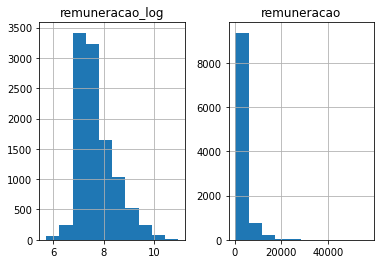

In [13]:
import numpy as np
treino['remuneracao_log'] = np.log(treino['remuneracao'])
treino[['remuneracao_log', 'remuneracao']].hist()


In [14]:
#treino['idade_raiz'] = np.sqrt(treino['idade'])
treino['idade_transf'] = np.log(treino['idade']) # melhor
#treino['horas_trabalho_por_semana_transf'] = np.log(treino['horas_trabalho_por_semana'].replace(0,1))
#treino['horas_trabalho_por_semana_raiz'] = np.sqrt(treino['horas_trabalho_por_semana'].replace(0,1))
#treino['tempo_no_emprego_transf'] = np.log(treino['tempo_no_emprego'].replace(0,1))
treino['tempo_no_emprego_raiz'] = treino['tempo_no_emprego']**(1/3) #melhor
#treino[['tempo_no_emprego_raiz', 'tempo_no_emprego', 'tempo_no_emprego_transf']].hist()
treino[['idade', 'remuneracao', 'remuneracao_log']].corr()



idade  remuneracao  remuneracao_log
idade            1.000000     0.266907         0.340612
remuneracao      0.266907     1.000000         0.852984
remuneracao_log  0.340612     0.852984         1.000000

In [15]:
# TRANSFORMAÇÂO REVERSA DA REMUNERACAO 
# np.exp(treino['remuneracao_log'])


In [16]:
treino.corr()

sexo  ...  tempo_no_emprego_raiz
sexo                       1.000000  ...               0.095929
idade                      0.038590  ...               0.574311
faixa_etaria               0.038603  ...               0.553109
cor_raca                   0.186688  ...               0.528010
escolaridade               0.207431  ...               0.101282
horas_trabalho_por_semana -0.120585  ...              -0.262626
portador_de_deficiencia   -0.004342  ...              -0.000984
tamanho_da_empresa         0.078382  ...               0.361627
tempo_no_emprego           0.088845  ...               0.921792
id                         0.182978  ...               0.050237
remuneracao               -0.011346  ...               0.360514
remuneracao_log           -0.000023  ...               0.473002
idade_transf               0.041757  ...               0.569178
tempo_no_emprego_raiz      0.095929  ...               1.000000

[14 rows x 14 columns]

In [17]:
treino = treino.drop(['idade',
                      'tempo_no_emprego'], axis = 1)
treino

sexo  faixa_etaria  ...  idade_transf  tempo_no_emprego_raiz
11797     1             6  ...      3.850148               4.065585
5899      1             4  ...      3.295837               2.466212
9513      1             7  ...      4.007333               2.880487
1572      1             6  ...      3.828641               2.635221
12995     1             3  ...      3.044522               2.872430
...     ...           ...  ...           ...                    ...
5191      1             3  ...      3.044522               1.216440
13418     2             5  ...      3.555348               5.293144
5390      1             6  ...      3.850148               2.924018
860       2             5  ...      3.465736               3.987461
7270      1             6  ...      3.761200               2.615879

[10500 rows x 12 columns]

In [18]:
treino.drop('remuneracao', axis = 1, inplace = True)
treino

sexo  faixa_etaria  ...  idade_transf  tempo_no_emprego_raiz
11797     1             6  ...      3.850148               4.065585
5899      1             4  ...      3.295837               2.466212
9513      1             7  ...      4.007333               2.880487
1572      1             6  ...      3.828641               2.635221
12995     1             3  ...      3.044522               2.872430
...     ...           ...  ...           ...                    ...
5191      1             3  ...      3.044522               1.216440
13418     2             5  ...      3.555348               5.293144
5390      1             6  ...      3.850148               2.924018
860       2             5  ...      3.465736               3.987461
7270      1             6  ...      3.761200               2.615879

[10500 rows x 11 columns]

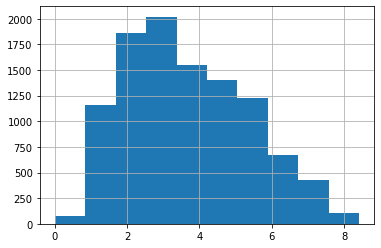

In [19]:
treino.tempo_no_emprego_raiz.hist()

In [20]:
treino.head(1)

sexo  faixa_etaria  ...  idade_transf  tempo_no_emprego_raiz
11797     1             6  ...      3.850148               4.065585

[1 rows x 11 columns]

### Criação de possíveis dataframes para avaliação

In [21]:
dados_1 = treino.copy()
dados_1 = dados_1.drop('id', axis = 1)
num_11 = ['horas_trabalho_por_semana','idade_transf', 'tempo_no_emprego_raiz']
cat_11 = ['sexo', 'faixa_etaria', 'cor_raca', 'escolaridade', 'portador_de_deficiencia', 'tamanho_da_empresa']
num_12 = ['horas_trabalho_por_semana','idade_transf', 'tempo_no_emprego_raiz', 'faixa_etaria', 'escolaridade', 'tamanho_da_empresa']
cat_12 = ['sexo', 'cor_raca', 'portador_de_deficiencia']
dados_2 = treino.copy()
dados_2 = dados_2.drop(['sexo', 'faixa_etaria', 'id'], axis = 1)
num_21 = ['horas_trabalho_por_semana','idade_transf', 'tempo_no_emprego_raiz']
cat_21 = ['cor_raca', 'escolaridade', 'portador_de_deficiencia', 'tamanho_da_empresa']
num_22 = ['horas_trabalho_por_semana','idade_transf', 'tempo_no_emprego_raiz', 'escolaridade', 'tamanho_da_empresa']
cat_22 = ['cor_raca', 'portador_de_deficiencia']
dados_3 = treino.copy()
dados_3 = dados_3.drop(['sexo', 'idade_transf', 'id'], axis = 1)
num_31 = ['horas_trabalho_por_semana', 'tempo_no_emprego_raiz']
cat_31 = ['faixa_etaria', 'cor_raca', 'escolaridade', 'portador_de_deficiencia', 'tamanho_da_empresa']
num_32 = ['horas_trabalho_por_semana', 'tempo_no_emprego_raiz', 'faixa_etaria', 'escolaridade', 'tamanho_da_empresa']
cat_32 = ['cor_raca', 'portador_de_deficiencia']
dados_4 = treino.copy()
dados_4 = dados_4.drop(['sexo', 'id'], axis = 1)
num_41 = ['horas_trabalho_por_semana','idade_transf', 'tempo_no_emprego_raiz']
cat_41 = ['faixa_etaria', 'cor_raca', 'escolaridade', 'portador_de_deficiencia', 'tamanho_da_empresa']
num_42 = ['horas_trabalho_por_semana','idade_transf', 'tempo_no_emprego_raiz', 'faixa_etaria', 'escolaridade', 'tamanho_da_empresa']
cat_42 = ['cor_raca', 'portador_de_deficiencia']
dados_5 = treino.copy()
dados_5 = dados_5.drop(['sexo', 'faixa_etaria', 'portador_de_deficiencia', 'id'], axis = 1)
num_51 = ['horas_trabalho_por_semana','idade_transf', 'tempo_no_emprego_raiz']
cat_51 = ['cor_raca', 'escolaridade', 'tamanho_da_empresa']
num_52 = ['horas_trabalho_por_semana','idade_transf', 'tempo_no_emprego_raiz', 'escolaridade', 'tamanho_da_empresa']
cat_52 = [ 'cor_raca']
dados_6 = treino.copy()
dados_6 = dados_6.drop(['faixa_etaria', 'portador_de_deficiencia', 'id'], axis = 1)
num_61 = ['horas_trabalho_por_semana','idade_transf', 'tempo_no_emprego_raiz']
cat_61 = ['sexo', 'cor_raca', 'escolaridade', 'tamanho_da_empresa']
num_62 = ['horas_trabalho_por_semana','idade_transf', 'tempo_no_emprego_raiz', 'escolaridade', 'tamanho_da_empresa']
cat_62 = ['sexo', 'cor_raca']

### Alguns testes omitidos no notebook porque nao acarretaram o resultado desejado de melhora no modelo, mesmo mostrando serem mudanças de variáveis interesssantes


educacao * tempo_na_empresa

educacao * tamanho_da_empresa

raca_cor_99 como binario

raca_cor_99 * tempo_na_empresa

educacao/horas_trabalhadas_por_semana

educacao*tempo_no_emprego/horas_trabalhadas_por_semana


Não usando todas essas variaveis juntas, evitando a multicolinearidade... Mas todas trouxeram resultados consideráveis mas no modelo final não gerou resultado melhor.